# Reparameterization Trick

Inspired from the example given by Goker Erdogan http://gokererdogan.github.io/2016/07/01/reparameterization-trick/

Suppose we have a Normal distribution parameterized by $\theta$: 

$$x \sim p_\theta(x) = N(\theta,1) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x-\theta)^2}$$

We draw samples from it and then use those samples to find the minimum of: $J(\theta) = E_{x \sim p_\theta(x)}[x^2]$. And we do so using gradient descent.

### Score/Reinforce way

We take a derivative of $J(\theta)$ with respect to $\theta$:

$$\nabla_\theta J(\theta)$$ 
$$= \nabla_\theta  E_{x \sim p_\theta(x)}[x^2]$$
$$= \nabla_\theta \int{p_\theta(x) x^2 dx}$$
$$= \int{\nabla_\theta{p_\theta(x)} x^2 dx}$$
$$= \int{\frac{p_\theta(x)}{p_\theta(x)} \nabla_\theta{p_\theta(x)} x^2 dx}$$
$$= \int{p_\theta(x) \frac{\nabla_\theta{p_\theta(x)}}{p_\theta(x)}  x^2 dx}$$
$$= \int{p_\theta(x) \nabla_\theta{log{p_\theta(x)}  x^2 dx}}$$
$$= E_{x \sim p_\theta(x)} [\nabla_\theta{log{p_\theta(x)}}  x^2]$$

We can now use Monte Carlo estimate of this using samples:

$$\widehat{\nabla_\theta J(\theta)} = \frac{1}{N} \sum_{i=1}^{N} \nabla_\theta{log{p_\theta(x_i)}}  x_i^2$$

Substituting expression for $p_\theta(x)$ from above and taking a log followed by gradient wrt $\theta$, we get:

$$\widehat{\nabla_\theta J(\theta)} = \frac{1}{N} \sum_{i=1}^{N} (x_i-\theta)  x^2_i \;\;\;\; \text{...(1)}$$


### Reparameterization Trick

Let: $$x = \theta+\epsilon \;\;\;\; {\text{where}} \;\;\; \epsilon \sim N(0,1)$$ 

This reparameterization leaves the distribution: 

$$p_\theta(x) = N(\theta,1)$$

Let us now again calculate $\nabla_\theta J(\theta) = \nabla_\theta E_{x \sim p_\theta(x)}[x^2]$

$$\nabla_\theta J(\theta)$$ 
$$= \nabla_\theta  E_{x \sim p_\theta(x)}[x^2]$$
$$= \nabla_\theta  E_{\epsilon \sim N(0,1)}[(\theta+\epsilon)^2]$$
As Expectation does not depend on $\theta$, we can move the gradient inside without getting in the `log` issue as in previous method:

$$= \nabla_\theta \int{p(\epsilon) (\theta+\epsilon)^2 d\epsilon}$$
$$=  \int{p(\epsilon) \nabla_\theta(\theta+\epsilon)^2 d\epsilon}$$
$$=  \int{p(\epsilon) 2(\theta+\epsilon) d\epsilon}$$
$$= E_{\epsilon \sim N(0,1)}[2 (\theta+\epsilon)] $$

Next, we convert Expectation to MC estimate to get:

$$\widehat{\nabla_\theta J(\theta)} = \frac{1}{N} \sum_{i=1}^{N} 2(\theta+\epsilon_i) \;\;\;\; \text{...(2)}$$

### Experiment

Let us say $\theta=2$

1) We generate samples for $x \sim N(\theta,1)$ and use these samples in equation (1) to calculate the REINFORCE estimate of $\nabla_\theta J(\theta)$

2) We generate samples for $\epsilon \sim N(0,1)$ and use these samples in equation (2) to calculate the Reparameterized estimate of $\nabla_\theta J(\theta)$


We do so for various values of N and compare the estimate of $\nabla_\theta J(\theta)$ in both the cases. We also calculate the Variance of the estimate in both the cases.


**We can see that Variance is lot higher in REINFORCE as compared to Reparameterization - almost higher by one more of magnitude. This is the Apporach of Reparameterization that we will use in Soft Actor Critic.**

You can also analytically derive the mean and variance of Equations (1) and (2) as below:

### Mean and Variance of Gradient Estimator in Equation (1):  mean=4; variance=87/N

$$E[\widehat{\nabla_\theta J(\theta)}] = E[\frac{1}{N} \sum_{i=1}^{N} (x_i-\theta)  x^2_i]$$
$$ = \frac{1}{N} \sum_{i=1}^{N} E[(x_i-\theta)  x^2_i]$$
$$ = \frac{1}{N} \sum_{i=1}^{N} E[x_i^3]-\theta E[x^2_i]$$
$$ = \frac{1}{N} \sum_{i=1}^{N} E[x_i^3]-\theta E[x^2_i]$$
$$ = \frac{1}{N} \sum_{i=1}^{N} (\mu^3+3 \mu {\sigma}^2) -\theta (\mu^2+\sigma^2)$$
$$ = (\mu^3+3 \mu {\sigma}^2) -\theta (\mu^2+\sigma^2)$$

putting $\theta=\mu$ and $\sigma=1$:

$$ = (2^3+3.2.1) -2.(2^2+1) = 14-10 = 4$$

Again, we calculate the variance of gradient estimate in equation (1)

$$Var(\widehat{\nabla_\theta J(\theta)}) = var(\frac{1}{N} \sum_{i=1}^{N} (x_i-\theta)  x^2_i)$$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} var(x_i^3-\theta.x^2_i)$$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} E[(x_i^3-\theta.x^2_i)^2] - (E[x_i^3-\theta.x^2_i])^2 $$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} E[x_i^6+\theta^2x_i^4-2.\theta.x^3_ix^2_i] - (E[x_i^3-\theta.x^2_i])^2 $$
$$ = \frac{1}{N} \left[ {\mu ^{6}+15\mu ^{4}\sigma ^{2}+45\mu ^{2}\sigma ^{4}+15\sigma ^{6}}+\theta^2 ({\displaystyle \mu ^{4}+6\mu ^{2}\sigma ^{2}+3\sigma ^{4}})-2.\theta({\displaystyle \mu ^{5}+10\mu ^{3}\sigma ^{2}+15\mu \sigma ^{4}}) - ({\displaystyle \mu ^{3}+3\mu \sigma ^{2}}-\theta.({\displaystyle \mu ^{2}+\sigma ^{2}}))^2 \right]$$

Putting $\theta=\mu=2, \;\; \text{and} \;\; \sigma=1$:


$$Var(\widehat{\nabla_\theta J(\theta)}) = \frac{1}{N}[2^6+15.2^4+45.2^2+15+4(2^4+6.2^2+3)-4(2^5+10.2^3+15.2)-(2^3+3.2-2(2^2+1))^2]$$

$$Var(\widehat{\nabla_\theta J(\theta)}) = \frac{1}{N}[64+240+180+15+4(16+6.4+3)-4(32+10.8+15.2)-(8+3.2-2(4+1))^2]$$

$$Var(\widehat{\nabla_\theta J(\theta)}) = \frac{1}{N}[64+240+180+15+4(16+6.4+3)-4(32+10.8+15.2)-(8+3.2-2(4+1))^2]$$

$$Var(\widehat{\nabla_\theta J(\theta)}) = \frac{87}{N}$$


### Mean and Variance of Gradient Estimator in Equation (2):  mean=4; variance=4/N

$$E[\widehat{\nabla_\theta J(\theta)}] = E[\frac{1}{N} \sum_{i=1}^{N} 2(\theta+\epsilon_i)]$$
$$= \frac{1}{N} \sum_{i=1}^{N} 2E[(\theta+\epsilon_i)]$$
$$= \frac{1}{N} \sum_{i=1}^{N} 2.\theta$$
$$ E[\widehat{\nabla_\theta J(\theta)}] = 2.\theta = 4$$

Let us calculate the variance

$$Var(\widehat{\nabla_\theta J(\theta)}) = Var(\frac{1}{N} \sum_{i=1}^{N} 2(\theta+\epsilon_i))$$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} Var(2(\theta+\epsilon_i))$$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} Var(2\epsilon_i)$$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} 4.Var(\epsilon_i)$$
$$ = \frac{1}{N^2} \sum_{i=1}^{N} 4.1$$
$$ Var(\widehat{\nabla_\theta J(\theta)})= \frac{4}{N}$$

### Conclusion from Analytical Solution

We can see analytically that Estimate of Gradient in equation (1) and (2) both is equal to **mean=4**. However, Variance in method/equation 1 is $\frac{87}{N}$ vs that in method 2 being $\frac{87}{N}$:

$$mean_1 = mean_2 = 4$$
$$\frac{var_1}{var_2} = \frac{87}{4} = 21.75$$

We see that REINFORCE/SCORE approach has a higher variance, almost by one order of magnitude higher.


### Running the Experiment

In [1]:
import numpy as np
Ns = [10,100,1000,10000,100000]
runs=10000

theta = 2.0

grad_reinforce = lambda x: np.sum((x-theta) * np.square(x)) / x.size
grad_reparam = lambda eps: np.sum(2 * (theta+eps)) / eps.size

mean_reinforce = np.zeros_like(Ns, dtype=np.float32)
var_reinforce = np.zeros_like(Ns, dtype=np.float32)

mean_reparam = np.zeros_like(Ns, dtype=np.float32)
var_reparam = np.zeros_like(Ns, dtype=np.float32)

runs_reinforce = np.zeros(runs)
runs_reparam = np.zeros(runs)
for i,N in enumerate(Ns):
    for r in range(runs):
        x = np.random.default_rng().normal(theta, 1, N)
        runs_reinforce[r] = grad_reinforce(x)
        eps = np.random.default_rng().normal(0, 1, N)
        runs_reparam[r] = grad_reparam(eps)
    
    mean_reinforce[i] = np.mean(runs_reinforce)
    var_reinforce[i] = np.var(runs_reinforce)
    
    mean_reparam[i] = np.mean(runs_reparam)
    var_reparam[i] = np.var(runs_reparam)
    
print (mean_reinforce)
print (mean_reparam)
print
print (var_reinforce)
print (var_reparam)


[4.008513  3.9837909 3.9972649 4.0006776 3.9994502]
[3.9986959 3.999479  4.0004582 3.9999344 4.0000186]
[9.003560e+00 8.494680e-01 8.742704e-02 8.678474e-03 8.554653e-04]
[4.1074410e-01 3.9180346e-02 4.0255673e-03 4.0744917e-04 4.0299241e-05]


In [2]:
print ('mean_reinforce:\n', mean_reinforce)
print ('\nmean_reparam:\n', mean_reparam)
print ('\nratio of means:\n', mean_reinforce/mean_reparam)
print ()
print ()
print ('var_reinforce\n',var_reinforce)
print ('\nvar_reparam\n',var_reparam)
print ('\nratio of variances:\n',var_reinforce/var_reparam)


mean_reinforce:
 [4.008513  3.9837909 3.9972649 4.0006776 3.9994502]

mean_reparam:
 [3.9986959 3.999479  4.0004582 3.9999344 4.0000186]

ratio of means:
 [1.0024551 0.9960774 0.9992018 1.0001858 0.9998579]


var_reinforce
 [9.003560e+00 8.494680e-01 8.742704e-02 8.678474e-03 8.554653e-04]

var_reparam
 [4.1074410e-01 3.9180346e-02 4.0255673e-03 4.0744917e-04 4.0299241e-05]

ratio of variances:
 [21.92012  21.680973 21.717943 21.299526 21.227827]


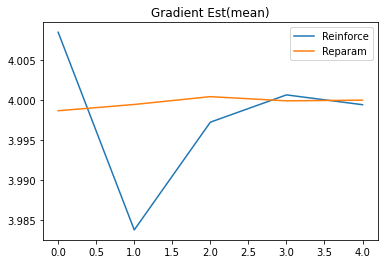

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(mean_reinforce, label='Reinforce')
ax.plot(mean_reparam, label='Reparam')

plt.title('Gradient Est(mean)')
ax.legend()
plt.show()

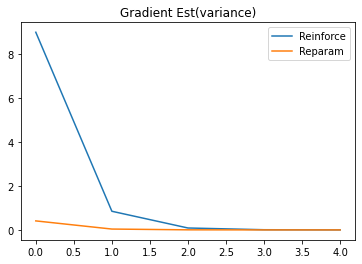

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(var_reinforce, label='Reinforce')
ax.plot(var_reparam, label='Reparam')

plt.title('Gradient Est(variance)')
ax.legend()
plt.show()